# Mulilabel and Multioutput classification

## Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Classifying-the-MNIST"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Classifying-the-MNIST


In [2]:
!pip install -r requirements.txt

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

In [7]:
X_train, X_test = mnist.data[:6000], mnist.data[6000:]
y_train, y_test = mnist.target[:6000], mnist.target[6000:]

## Multilabel Classification

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier

In [45]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_train_prime = np.isin(y_train.astype('int8'), [2, 3, 5, 7])
y_multilabel = np.c_[y_train_large, y_train_odd, y_train_prime]
y_multilabel

array([[False,  True,  True],
       [False, False, False],
       [False, False, False],
       ...,
       [ True, False, False],
       [False, False, False],
       [ True,  True, False]])

In [46]:
knn_clf = KNeighborsClassifier()
dummy_clf = DummyClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [47]:
some_digit = X_train[0]

print(y_train[0])
knn_clf.predict([some_digit])

5


array([[False,  True,  True]])

In [51]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
y_train_dummy_pred = cross_val_predict(dummy_clf, X_train, y_multilabel, cv=3)

array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [False,  True, False],
       [False,  True, False]])

In [53]:
print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))
print(f1_score(y_multilabel, y_train_dummy_pred, average="macro"))

0.95097845146962
0.2244333886124931


#### For models that don't support multilabel

In [61]:
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
try:
    svc_clf.fit(X_train[:2000], y_multilabel[:2000]) 
except ValueError:
    print("Throws ValueError because SVC does not support multilabel")

Throws ValueError because SVC does not support multilabel


In [62]:
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [65]:
chain_clf.predict([some_digit])

array([[0., 1., 1.]])

## Multioutput Classification

In [68]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

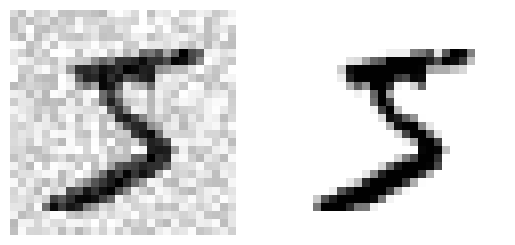

In [97]:
some_digit_mod = X_train_mod[0]

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plt.subplot(1, 2, 1)
plot_digit(some_digit_mod)
plt.subplot(1, 2, 2)
plot_digit(some_digit)

plt.show()